In [20]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [21]:
df=pd.read_excel("Final_Train.xlsx")

In [22]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [24]:
df["rating(%)"]=df["Rating"].str.split("%").str[0]


In [25]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,rating(%)
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,98
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,NaN
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,NaN
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,100


In [26]:
df["rating(%)"]=pd.to_numeric(df["rating(%)"], errors='coerce')

In [27]:
df["rating(%)"]=df["rating(%)"].fillna(df["rating(%)"].median())

In [28]:
df.drop("Rating",axis=1,inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       5961 non-null   object 
 1   Experience          5961 non-null   object 
 2   Place               5936 non-null   object 
 3   Profile             5961 non-null   object 
 4   Miscellaneous_Info  3341 non-null   object 
 5   Fees                5961 non-null   int64  
 6   rating(%)           5961 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 326.1+ KB


In [30]:
df["Experience"]=df["Experience"].str.split(" ").str[0]

In [31]:
df["Experience"]=pd.to_numeric(df["Experience"], errors='coerce')

In [32]:
df.head()

,Qualification,Experience,Place,Profile,Miscellaneous_Info,Fees,rating(%)
0,"BHMS, MD - Homeopathy",24,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,100.0
1,"BAMS, MD - Ayurveda Medicine",12,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,98.0
2,"MBBS, MS - Otorhinolaryngology",9,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,97.0
3,"BSc - Zoology, BAMS",12,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,97.0
4,BAMS,20,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,100.0


# Replace null with mode

In [33]:
df["Place"] =df.Place.fillna(df["Place"].mode()[0])


In [34]:
df.Miscellaneous_Info.value_counts().sort_values(ascending=False)

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                      40
Dental Fillings Zirconia Crowns Dental Implant Fixing                                   12
Tooth Extraction Dental Fillings Scaling / Polishing                                    12
Skin Allergy Treatment Skin Allergies Dermabrasion                                       9
Skin Disease Treatment Kidney Stone Treatment Gall Bladder (Biliary) Stone Treatment     9
                                                                                        ..
99% 196 Feedback Kundalahalli, Bangalore                                                 1
Dental Implant Fixing Laser Dentistry Laser Surgery                                      1
95% 5 Feedback T Nagar, Chennai                                                          1
68% 12 Feedback Malad West, Mumbai                                                       1
98% 180 Feedback Vijayanagar, Bangalore                                                  1

In [35]:
df.drop("Miscellaneous_Info",axis=1,inplace=True)

In [36]:
df["Location"]=df["Place"].str.split(",").str[0]

df["City"]=df["Place"].str.split(",").str[1]
df["city2"]=df["Place"].str.split(",").str[2]

In [37]:
df["city2"].unique()

array([nan, ' Delhi'], dtype=object)

From the above there is one value in city 2 which is Delhi therefore replacing it with Sector 5 

In [38]:
df["City"]= df["City"].str.replace("Sector 5", "Delhi") 

In [39]:
df.drop(columns=["Place","city2"],axis=1,inplace=True)

In [40]:
df.isnull().sum()

Qualification    0
Experience       0
Profile          0
Fees             0
rating(%)        0
Location         0
City             1
dtype: int64

In [41]:
df["City"]=df["City"].fillna(df["City"].mode()[0])

In [42]:
df.head()

,Qualification,Experience,Profile,Fees,rating(%),Location,City
0,"BHMS, MD - Homeopathy",24,Homeopath,100,100.0,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,Ayurveda,350,98.0,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,ENT Specialist,300,97.0,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,Ayurveda,250,97.0,Bannerghatta Road,Bangalore
4,BAMS,20,Ayurveda,250,100.0,Keelkattalai,Chennai


In [43]:
df["degree1"]=df["Qualification"].str.split(",").str[0]
df["degree2"]=df["Qualification"].str.split(",").str[1]

In [44]:
df.replace(to_replace =np.NaN, 
                 value ="Missing",inplace=True) 

In [45]:
df["degree1"].value_counts()

MBBS                                                      2448
BDS                                                       1208
BAMS                                                       711
BHMS                                                       706
MD - Dermatology                                            84
                                                          ... 
Ayurvedic panchkarma                                         1
MDS - Oral Medicine                                          1
Certification of Aesthetic Dentistry & Periodontics          1
MD - Social & Preventive Medicine / Community Medicine       1
MSc                                                          1
Name: degree1, Length: 151, dtype: int64

In [46]:
df["degree2"].value_counts()

Missing                                                           1962
 MS - ENT                                                          301
 MD - General Medicine                                             251
 MD - Dermatology                                                  244
 MBBS                                                              217
                                                                  ... 
 Diploma in Radio Therapy                                            1
 MBA - Hospital Administration                                       1
 PG Diploma in Preventive and Promotive Health Care (PGD PPHC)       1
 DORL (ENT)                                                          1
 M.Med in Family Medicine                                            1
Name: degree2, Length: 427, dtype: int64

In [47]:
df.drop("degree2",axis=1,inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qualification  5961 non-null   object 
 1   Experience     5961 non-null   int64  
 2   Profile        5961 non-null   object 
 3   Fees           5961 non-null   int64  
 4   rating(%)      5961 non-null   float64
 5   Location       5961 non-null   object 
 6   City           5961 non-null   object 
 7   degree1        5961 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 372.7+ KB


# UNIVARIATE ANALYSIS

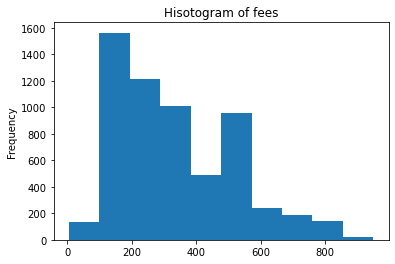

Maximum fees is: 950 
 Minimum fees is : 5


In [49]:
df["Fees"].plot.hist(bins=10)
plt.title("Hisotogram of fees")
plt.show()
print("Maximum fees is:",df["Fees"].max(),"\n","Minimum fees is :",df["Fees"].min())

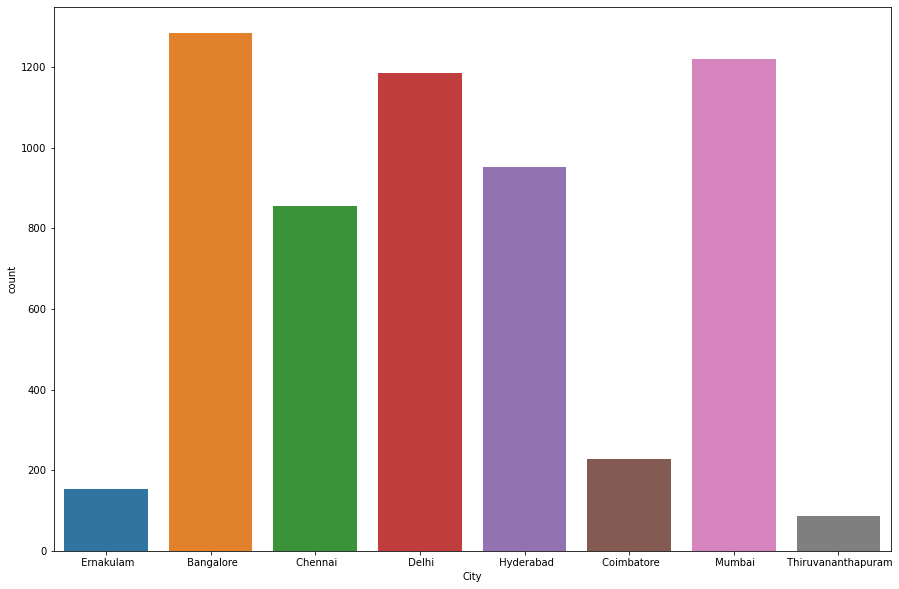

In [50]:
plt.figure(figsize=(15,10))
sns.countplot(df["City"])
plt.show()

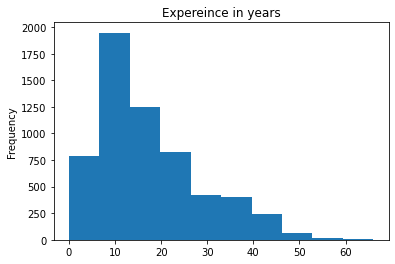

In [51]:
df["Experience"].plot.hist(bins=10)
plt.title("Expereince in years")
plt.show()

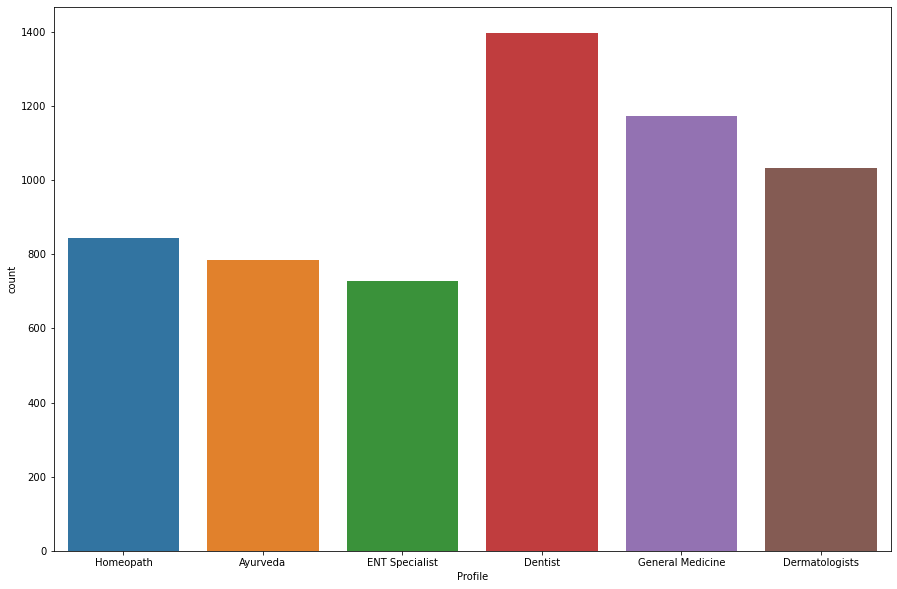

In [52]:
plt.figure(figsize=(15,10))
sns.countplot(df["Profile"])
plt.show()

Observation:Highest count of Dentist followed by General Medicine

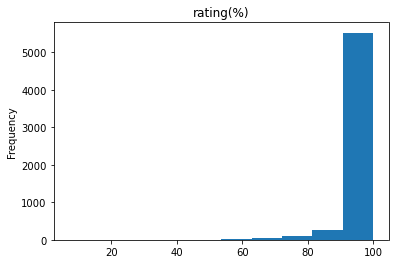

Maximum rating is: 100.0 
 Minimum rating is : 7.0


In [53]:
df["rating(%)"].plot.hist(bins=10)
plt.title("rating(%)")
plt.show()
print("Maximum rating is:",df["rating(%)"].max(),"\n","Minimum rating is :",df["rating(%)"].min())

# BIVARIATE ANALYSIS

City
 Bangalore             324.364486
 Chennai               283.602339
 Coimbatore            154.298246
 Delhi                 362.911392
 Ernakulam             188.431373
 Hyderabad             307.507886
 Mumbai                308.292863
 Thiruvananthapuram    167.267442
Name: Fees, dtype: float64


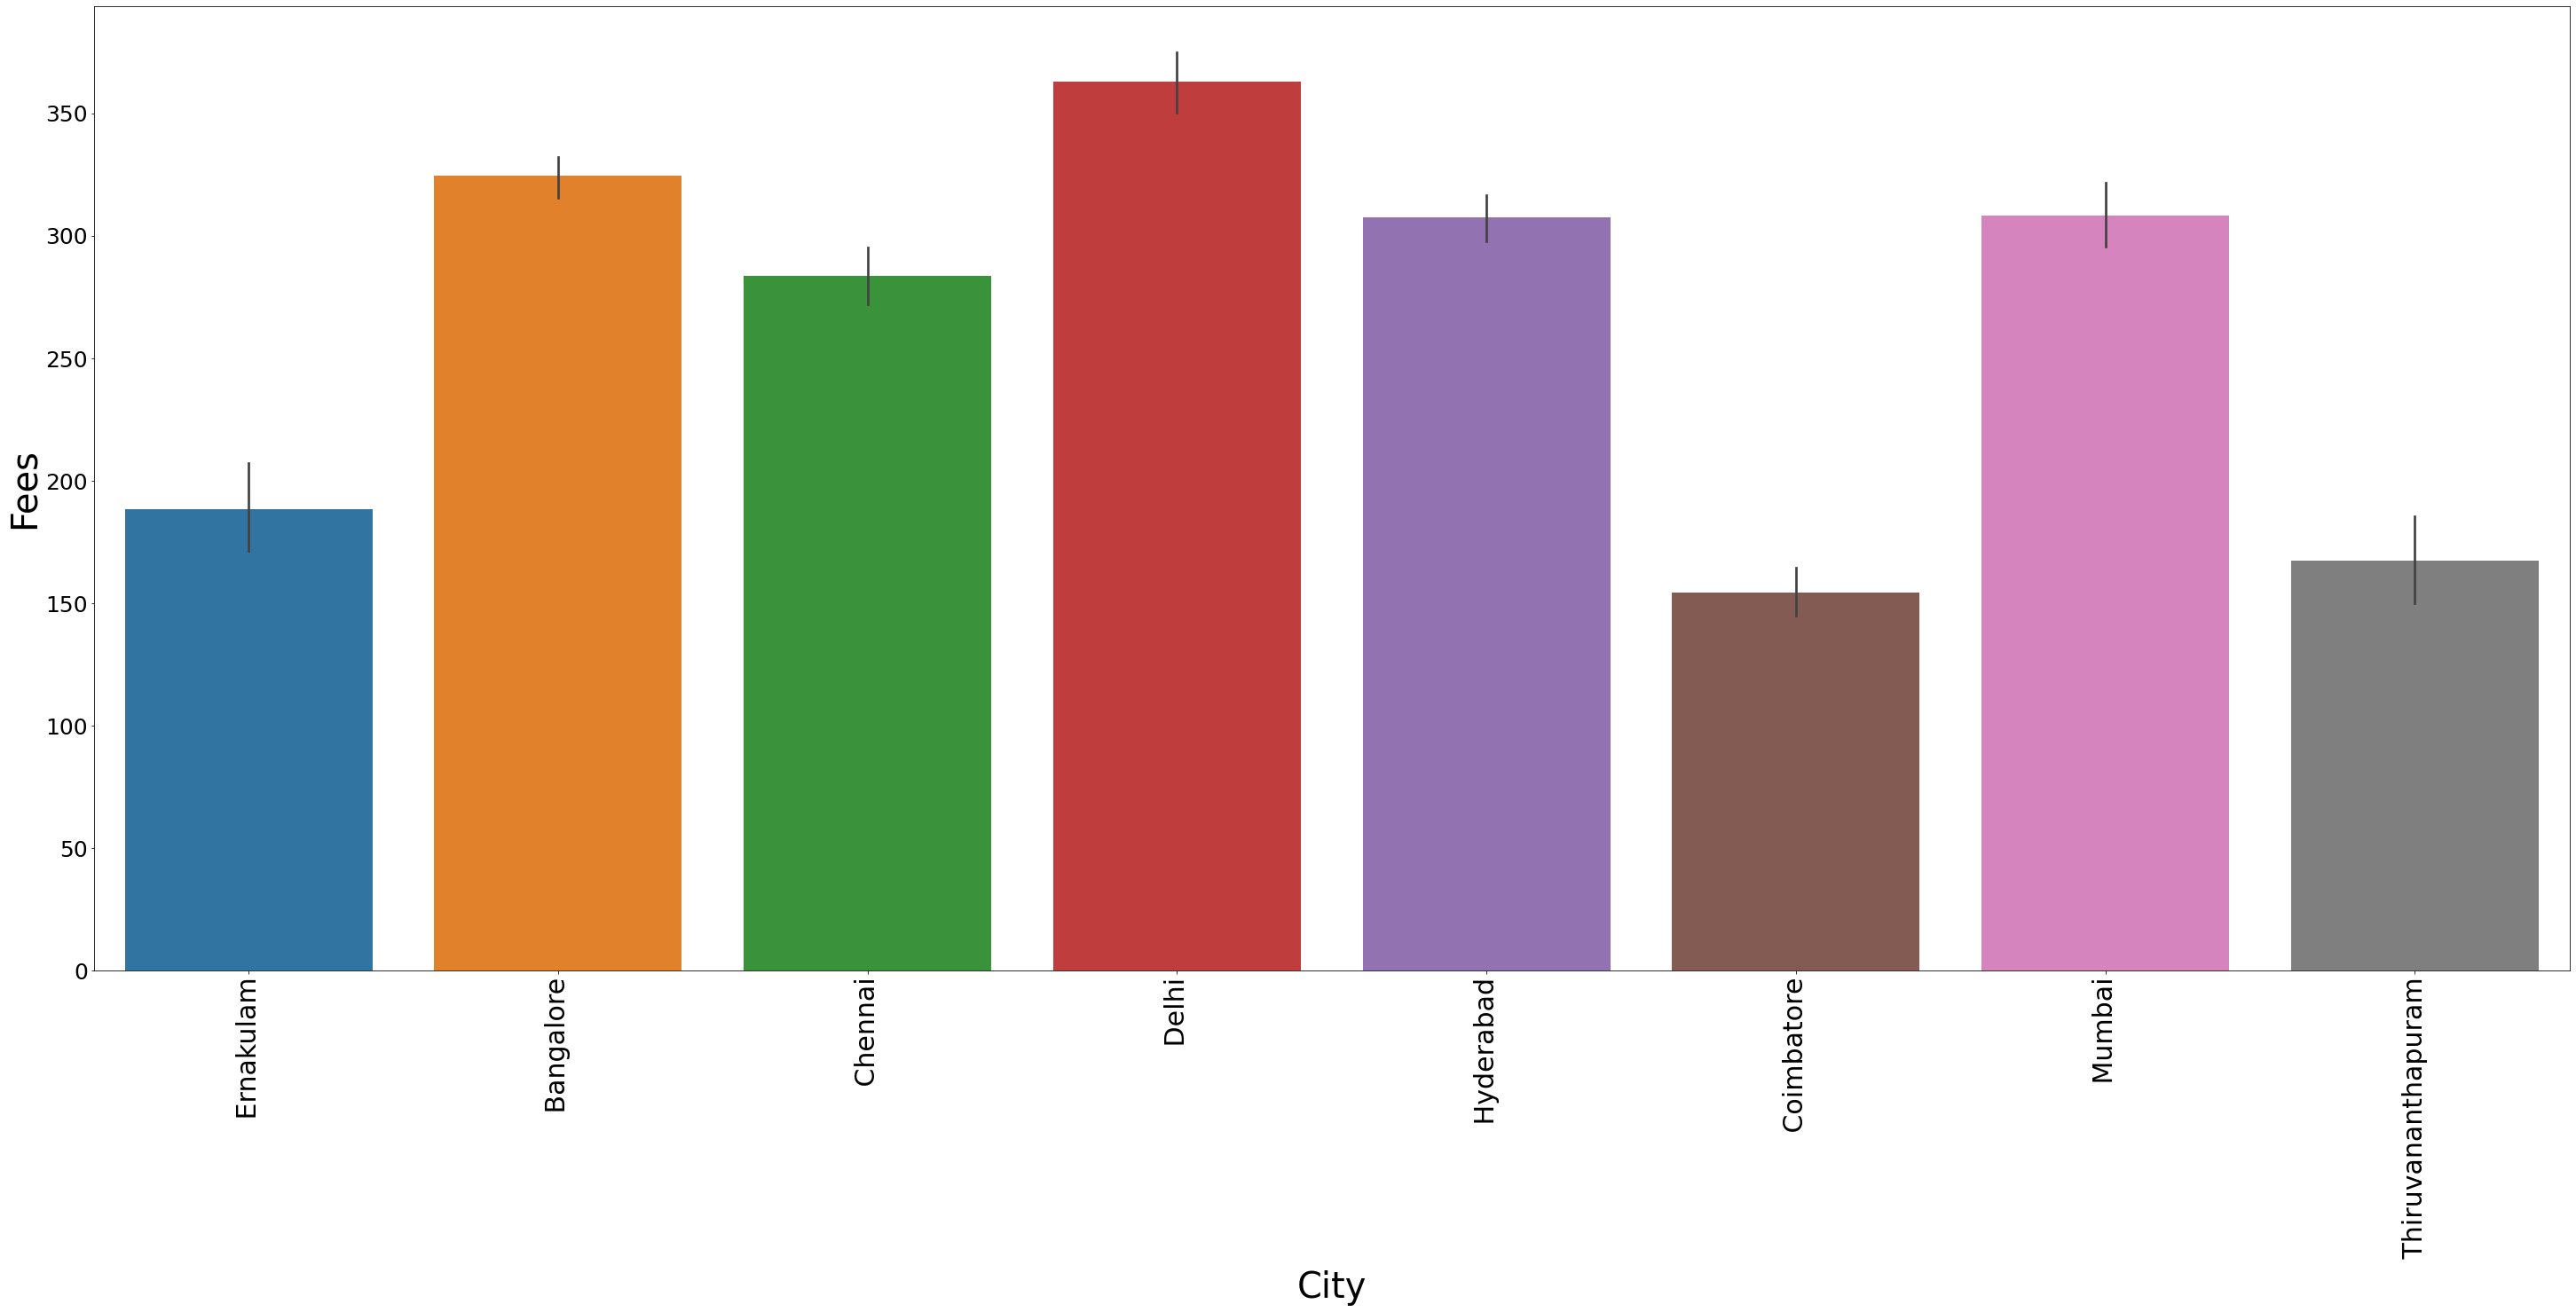

In [54]:
plt.figure(figsize=(50,20))
plt.xlabel("City", fontsize=40)
plt.ylabel("Fees", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=25)
sns.barplot(x="City",y="Fees",data=df)
print(df.groupby("City").Fees.mean())

Observation: The doctor's fees is more in Delhi followed by Bangalore and least in Coimbatore

Profile
Ayurveda            238.968193
Dentist             238.199714
Dermatologists      393.133462
ENT Specialist      387.321429
General Medicine    313.908781
Homeopath           306.499407
Name: Fees, dtype: float64


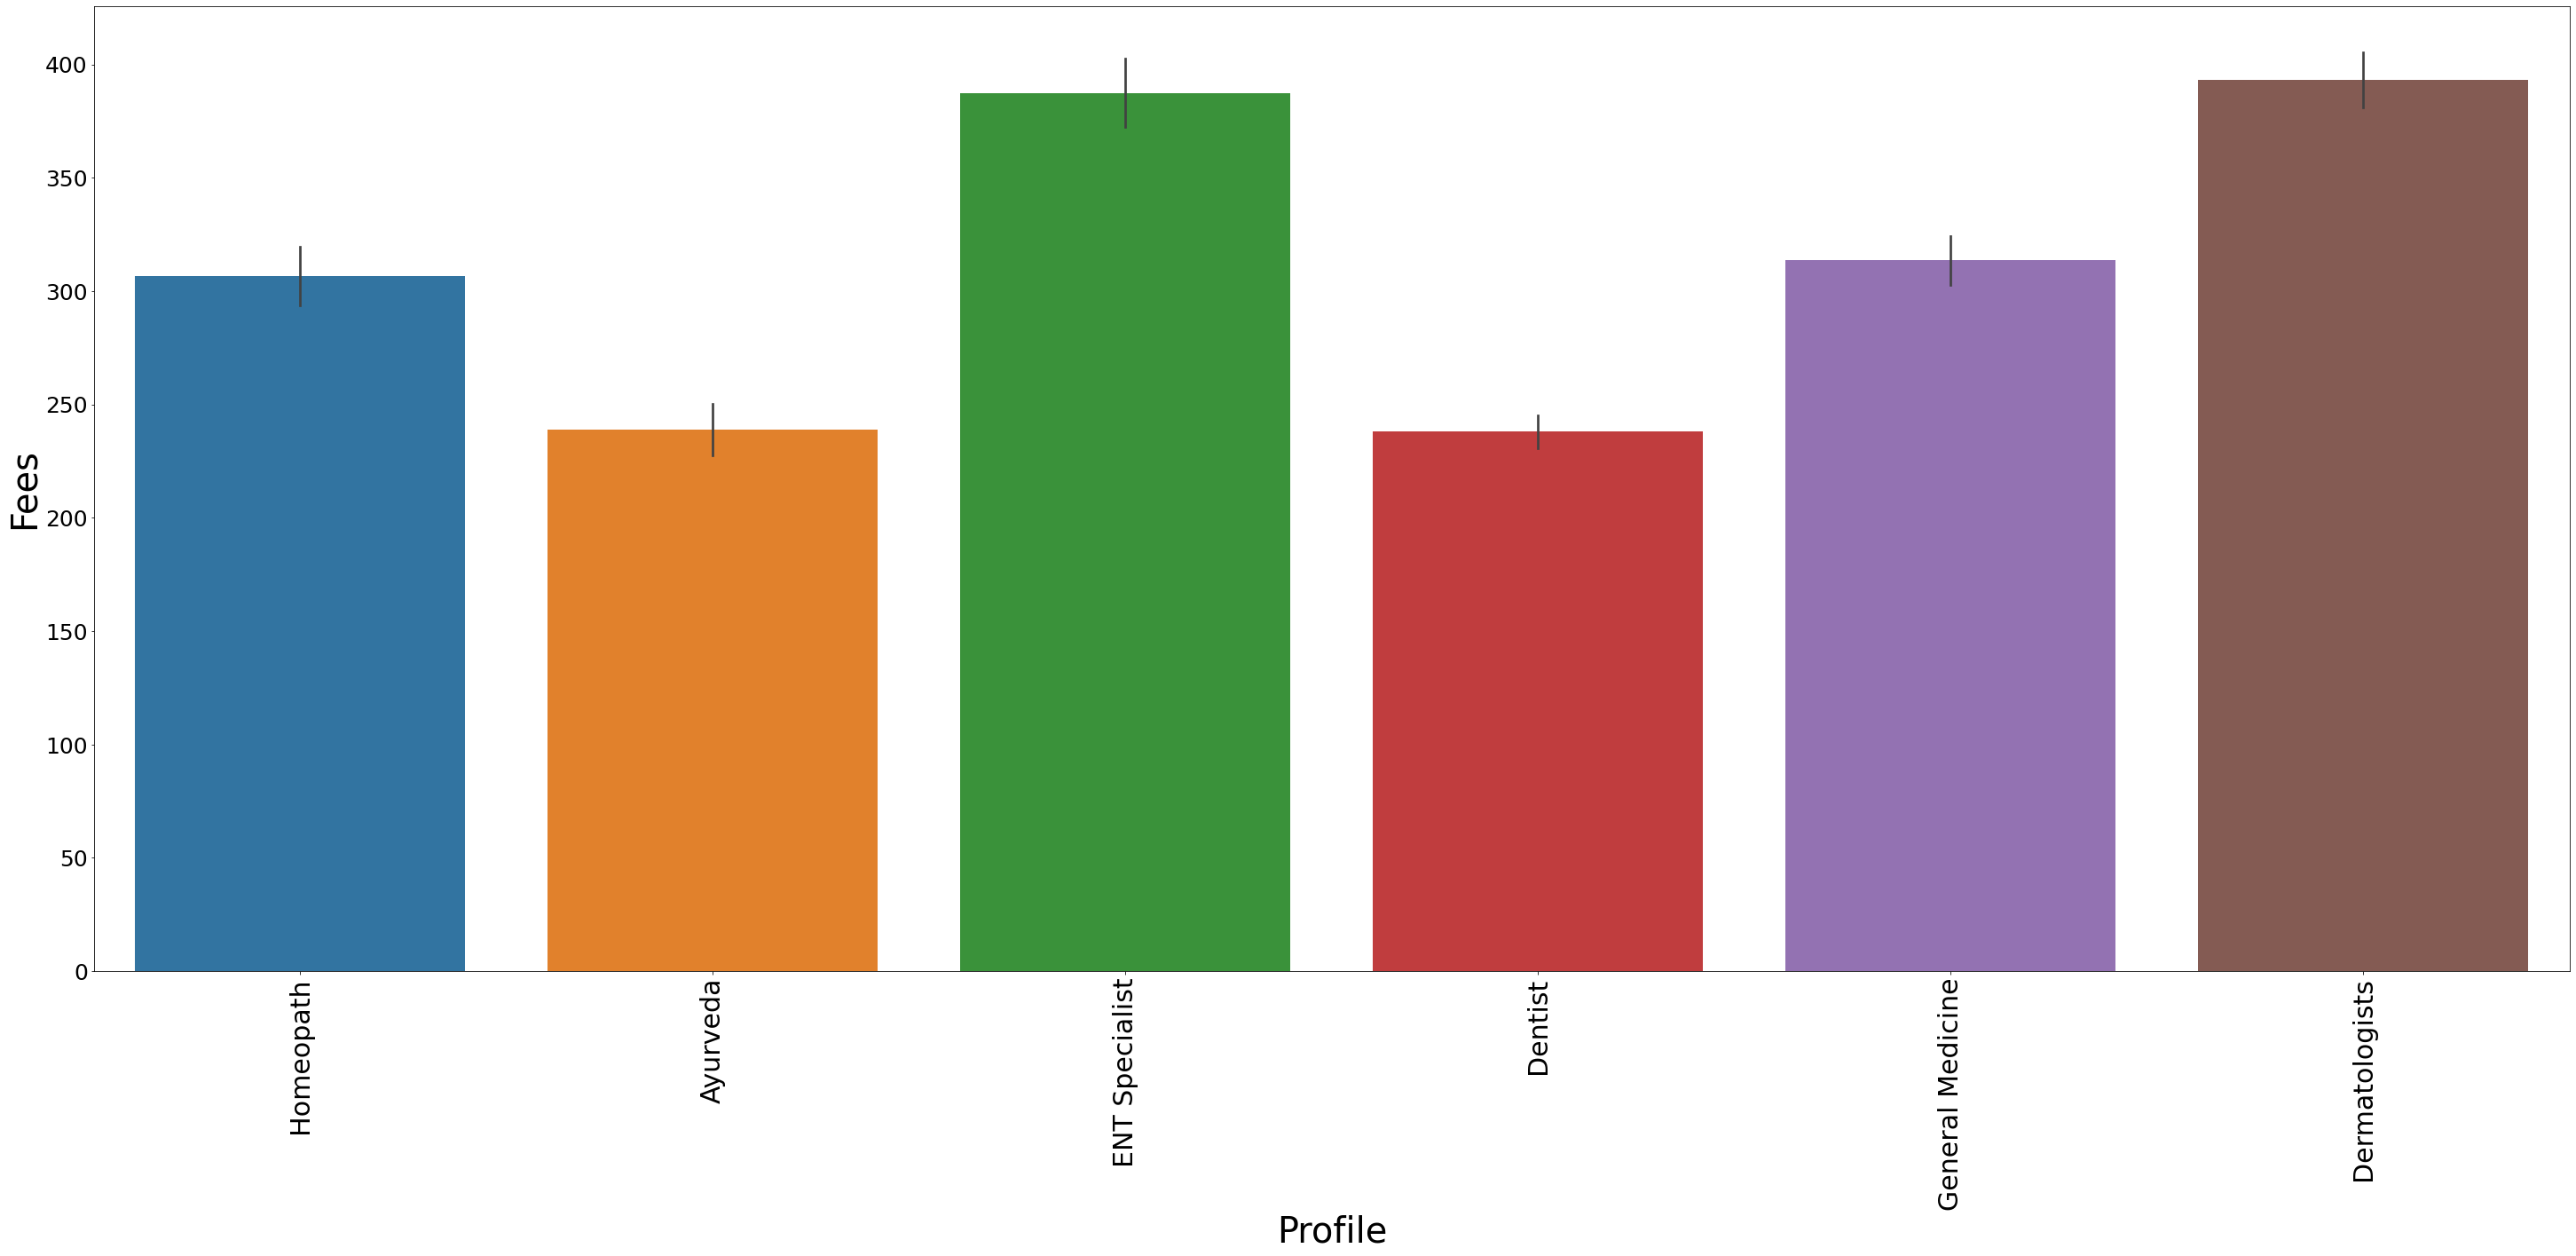

In [55]:
plt.figure(figsize=(50,20))
plt.xlabel("Profile", fontsize=40)
plt.ylabel("Fees", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=25)
sns.barplot(x="Profile",y="Fees",data=df)
print(df.groupby("Profile").Fees.mean())

Observation:The fees is maximum for Dermatologist and least for Dentist

In [56]:
#Creating labels for better visaulization 
rating_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89','90-99','100-109']
df['rating_group'] = pd.cut(df["rating(%)"], range(0, 111, 10), right=False, labels=rating_labels)


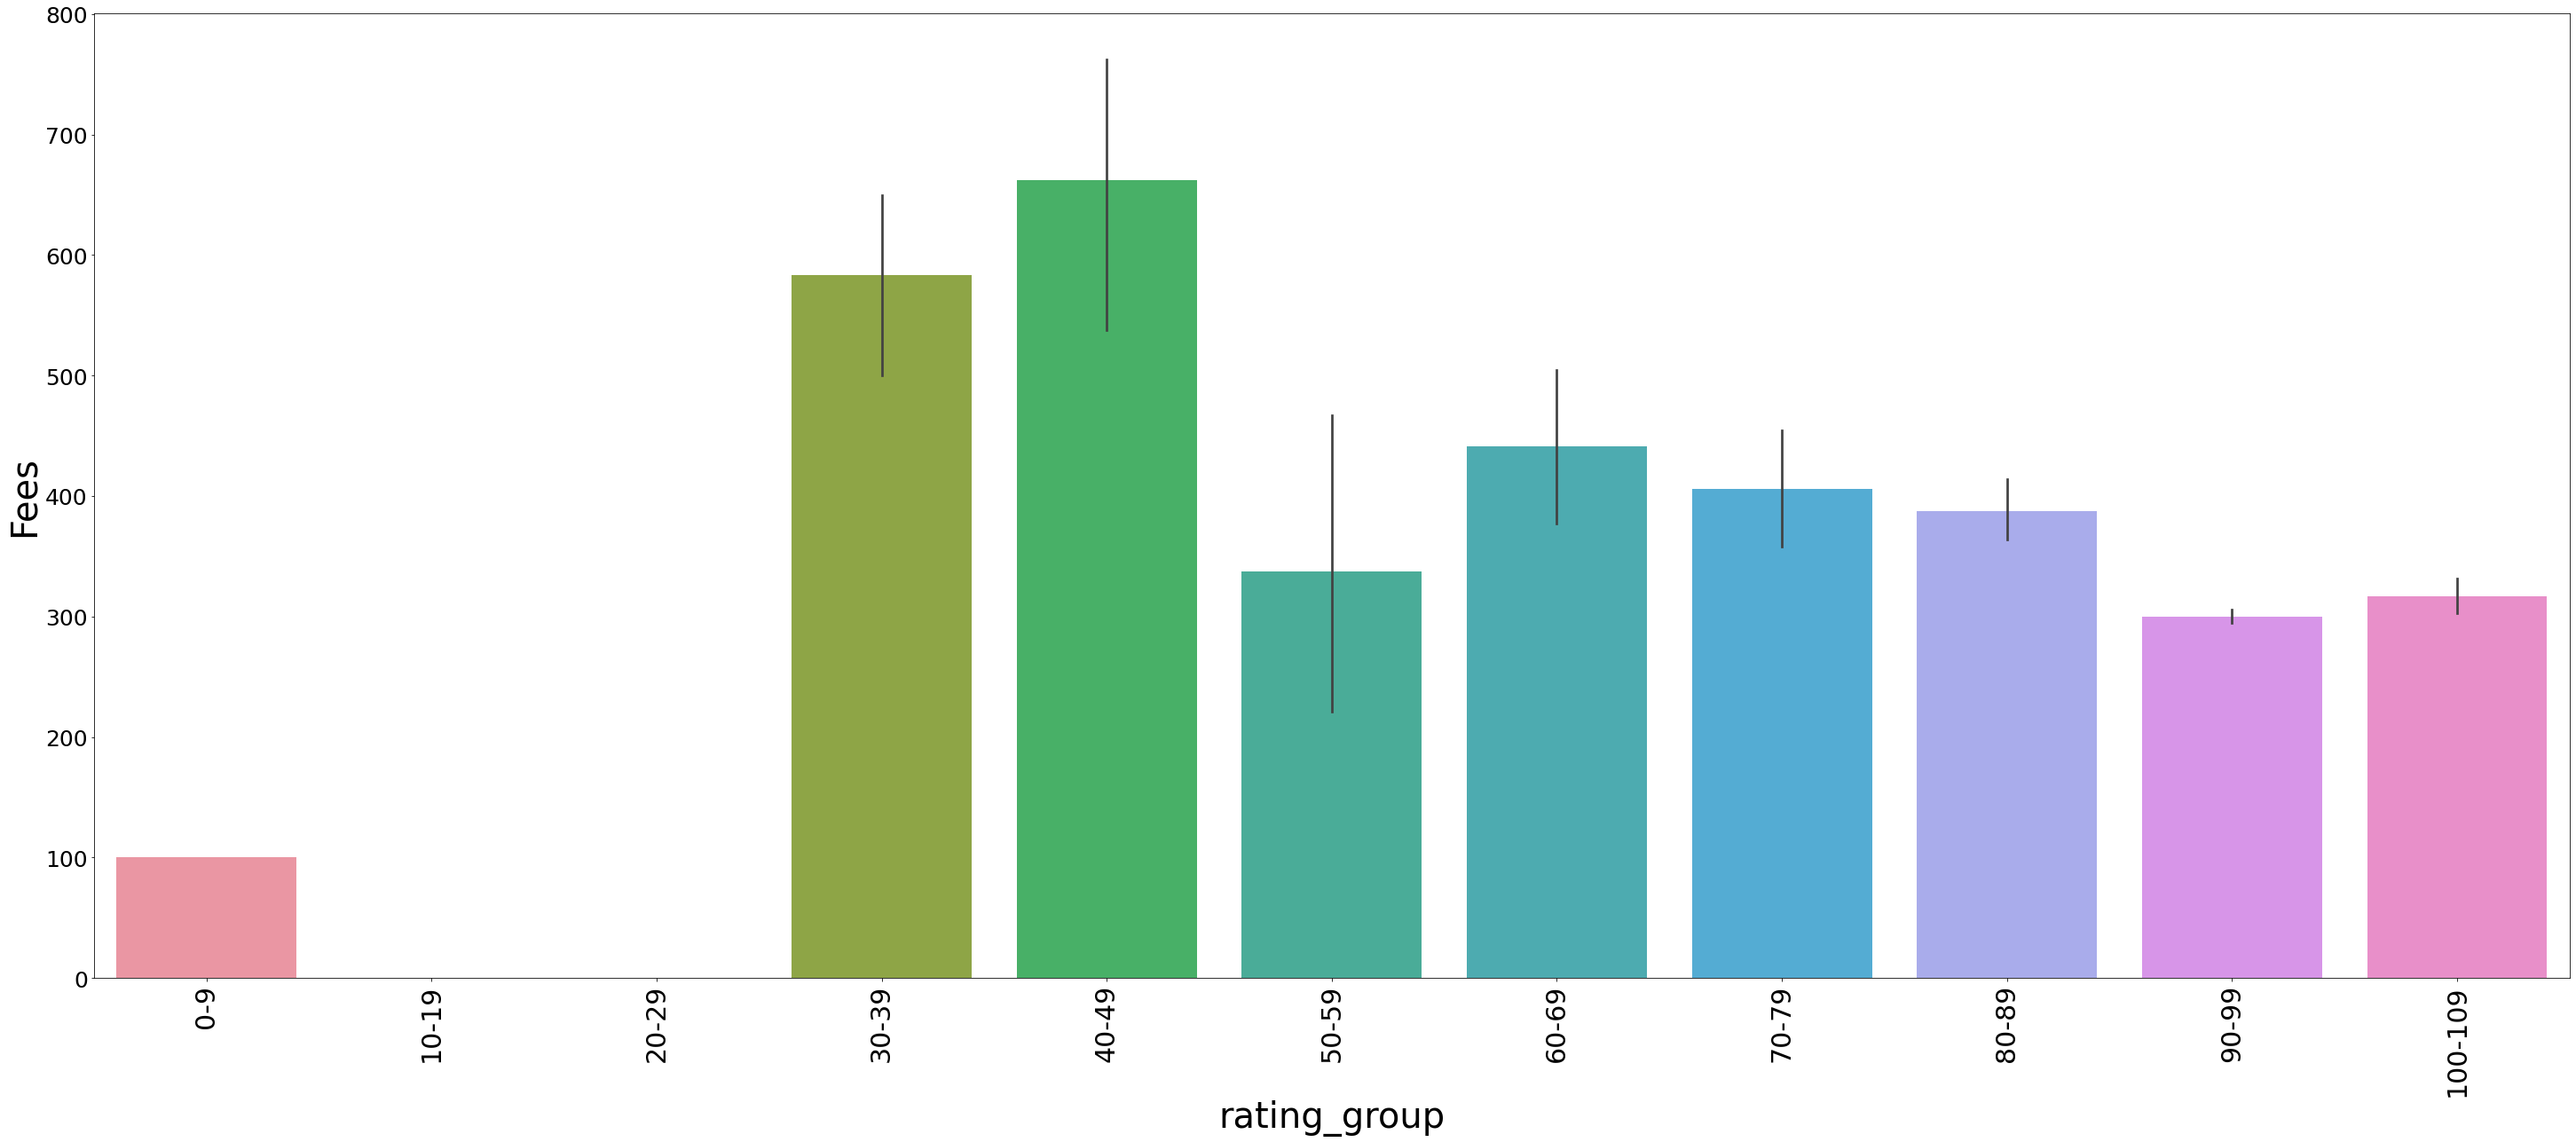

In [57]:
plt.figure(figsize=(50,20))
plt.xlabel("rating_group", fontsize=40)
plt.ylabel("Fees", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=25)
sns.barplot(x="rating_group",y="Fees",data=df)


Observation: Doctors with rating between 40-49 have more fees and least for 0-9

In [58]:
print(df["Experience"].max(),"\n",df["Experience"].min())
#creating bins on this basis

66 
 0


In [59]:
experience_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69']
df['experience_group'] = pd.cut(df["Experience"], range(0, 71, 10), right=False, labels=experience_labels)


experience_group
0-9      286.401102
10-19    319.770603
20-29    331.652502
30-39    320.093537
40-49    230.678571
50-59    254.761905
60-69    100.000000
Name: Fees, dtype: float64


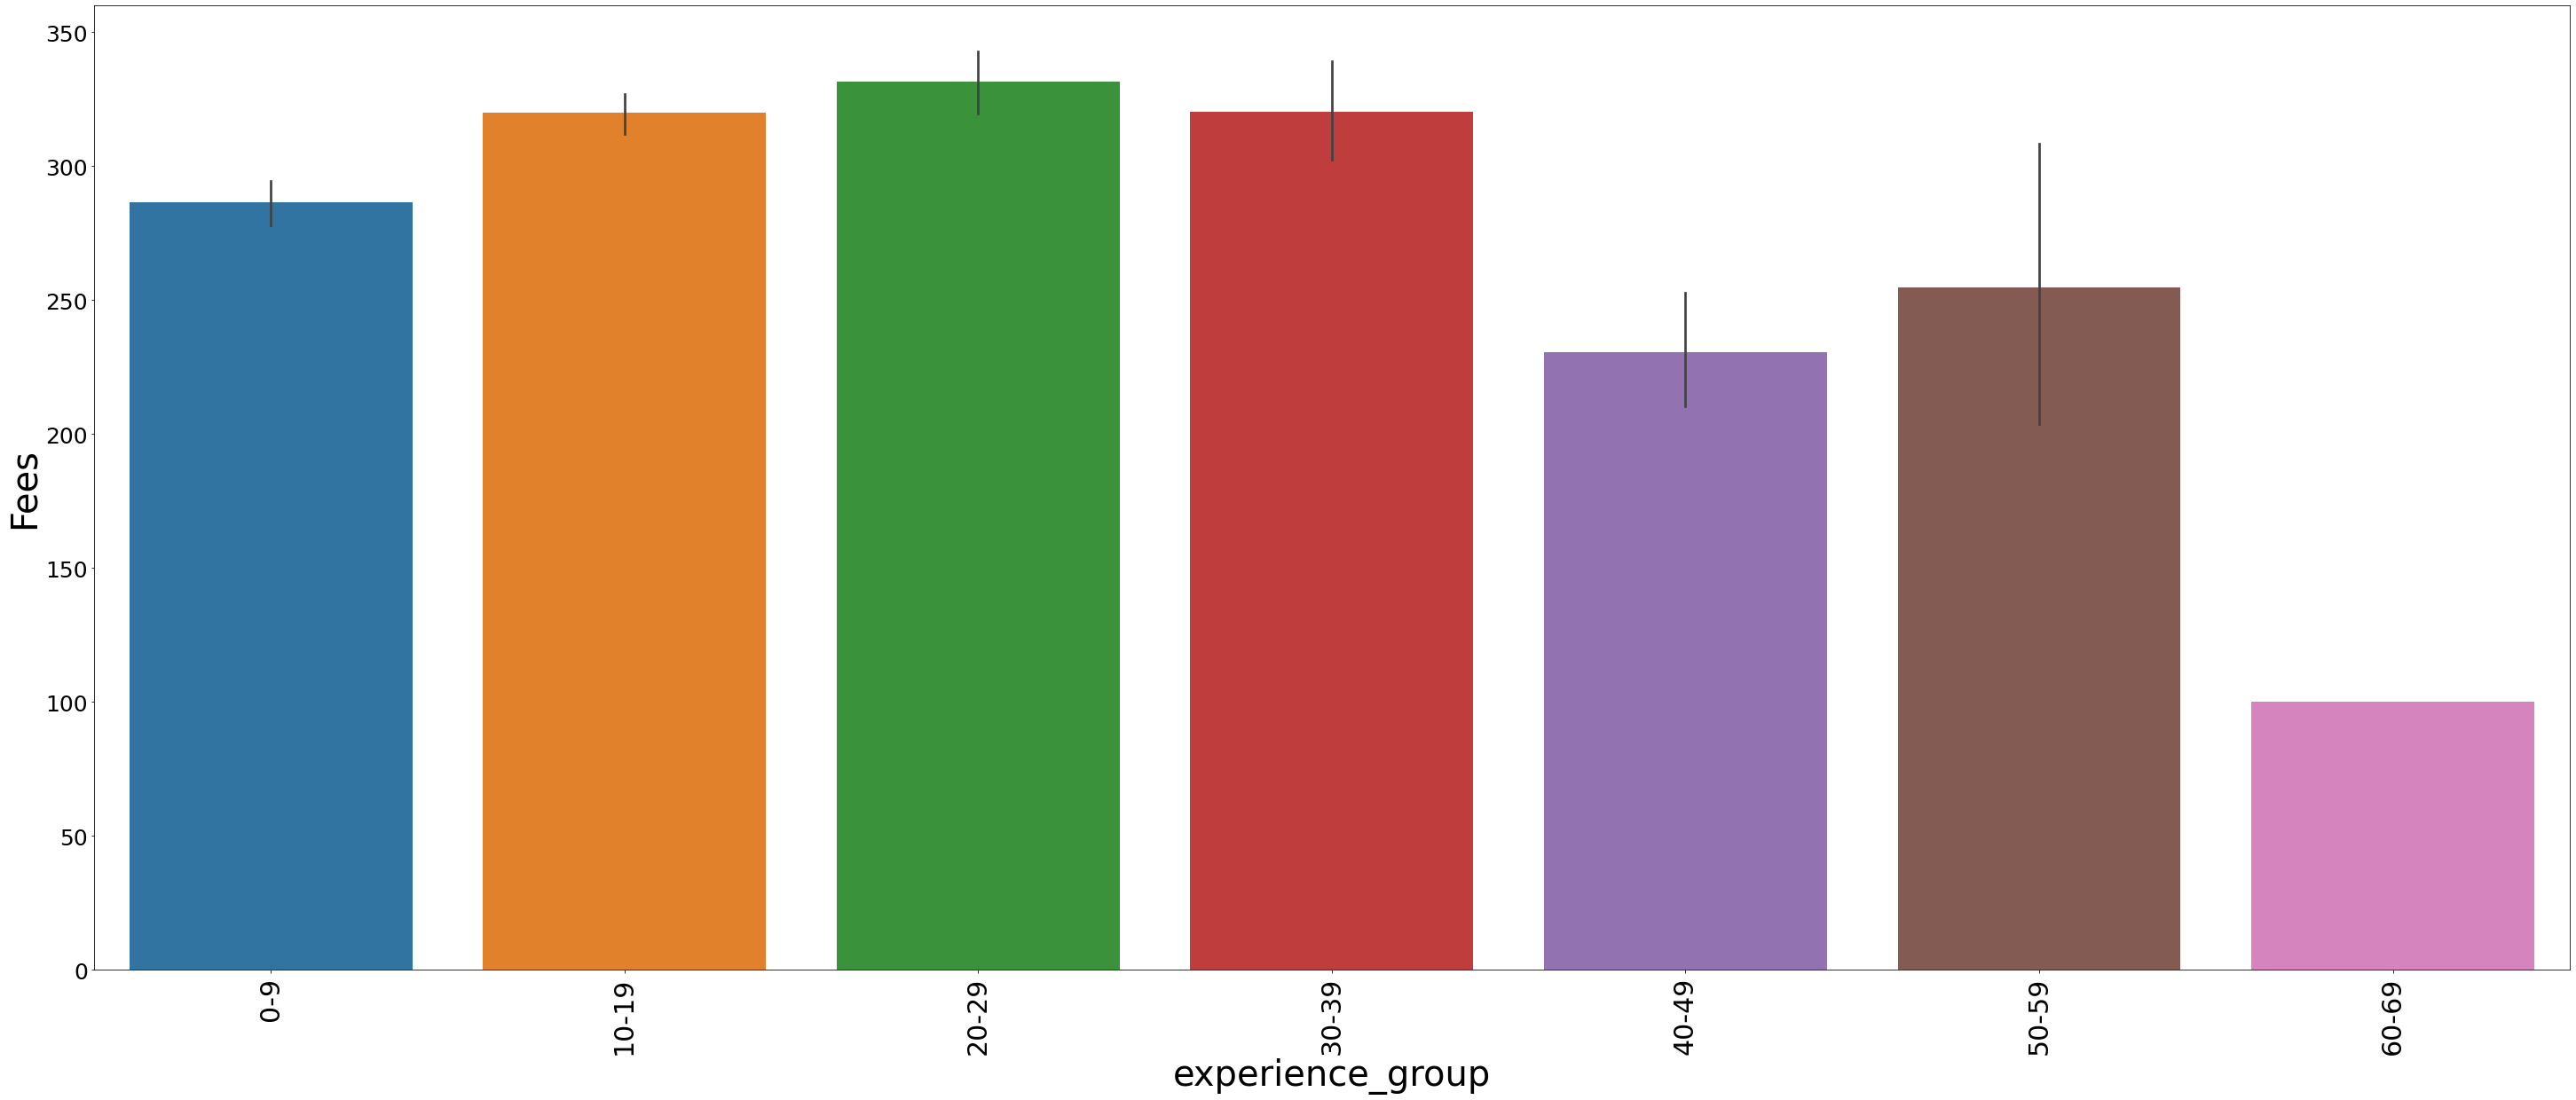

In [60]:
plt.figure(figsize=(50,20))
plt.xlabel("experience_group", fontsize=40)
plt.ylabel("Fees", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=25)
sns.barplot(x="experience_group",y="Fees",data=df)
print(df.groupby("experience_group").Fees.mean())

Observation:The fees is almost similiar for the range 10-19,20-29,30-39 .However doctors with maximum experience charge less

In [61]:
df.drop(columns=['rating_group', 'experience_group',"Qualification"],axis=1,inplace=True)

In [62]:
cols=['Profile','Location', 'City',"degree1"]
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for i in cols:
    df[i] = labelencoder.fit_transform(df[i])

In [63]:
from scipy import stats
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
threshold=3
new_df =df[(z < 3).all(axis=1)]
#removing outliers
print(new_df.shape,"\n",df.shape)


(5767, 7) 
 (5961, 7)


Observation:Almost 200 rows dropped with z score more than 3

In [65]:
from sklearn.preprocessing import power_transform
df_skewed=power_transform(new_df,method="yeo-johnson")
df_new=pd.DataFrame(df_skewed,columns=new_df.columns)

In [66]:
df_new.skew()

Experience   -0.002841
Profile      -0.131378
Fees         -0.047428
rating(%)     0.050559
Location     -0.264970
City         -0.217834
degree1      -0.112074
dtype: float64

In [67]:
corr_matrix=df_new.corr()
corr_matrix["Fees"].sort_values(ascending=False)

Fees          1.000000
degree1       0.236228
Profile       0.158104
Experience    0.013197
Location     -0.048870
rating(%)    -0.060646
City         -0.068680
Name: Fees, dtype: float64

# Model Evalution

In [68]:
x_re=df_new.drop("Fees",axis=1)
y=df_new["Fees"]

In [69]:
#Scaling the columns 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_re)
x=sc.transform(x_re)
x=pd.DataFrame(x,columns=x_re.columns)

In [70]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [71]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state = 42,test_size=0.20)


In [72]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(X_train,Y_train)
    print("score of ",m, "is:",m.score(X_train,Y_train))
    predm=m.predict(X_test)
    print("ERROR:")
    print(" Mean absolute error:", mean_absolute_error(Y_test,predm))
    print("Mean squared error:",mean_squared_error(Y_test,predm))
    print("r2 score :",r2_score(Y_test,predm))
    print("\n")

score of  LinearRegression() is: 0.06603940795282925
ERROR:
 Mean absolute error: 0.7924183121815369
Mean squared error: 0.9280398942985192
r2 score : 0.0750757026176172


score of  DecisionTreeRegressor() is: 0.9886659533841325
ERROR:
 Mean absolute error: 0.8680208709248735
Mean squared error: 1.4041297939227804
r2 score : -0.39941587754625685


score of  KNeighborsRegressor() is: 0.3717888307871292
ERROR:
 Mean absolute error: 0.7856493225689853
Mean squared error: 1.0058583853638092
r2 score : -0.0024815377705513786


score of  SVR() is: 0.20442686788448572
ERROR:
 Mean absolute error: 0.7609485666117948
Mean squared error: 0.9181820020223658
r2 score : 0.08490050017557593


score of  Lasso() is: 0.0
ERROR:
 Mean absolute error: 0.8417178505199325
Mean squared error: 1.003613880501158
r2 score : -0.00024456811459905303


score of  Ridge() is: 0.0660394054000597
ERROR:
 Mean absolute error: 0.7924204042526636
Mean squared error: 0.9280404333417233
r2 score : 0.0750751653840781


sco

In [73]:
from sklearn.model_selection import GridSearchCV
model=KNeighborsRegressor()
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
model1.fit(x,y)
print("Best Hyper Parameters:\n",model1.best_params_)

Best Hyper Parameters:
 {'algorithm': 'ball_tree', 'leaf_size': 2, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'uniform'}
